# Lineair Regression
Mark Klik & Misja Mikkers

# Introduction

In this course we will give you a short introduction to linear regression in `R`. This is not an extensive course, but it is aimed at helping you to get some intuition and to apply linear regression in `R`.

With linear regression we will be able to examine whether a variable (often called "the response" or "the dependent variable") has a correlation with one or more other variables ("predictors"). Or, one could say, we will use predictors to predict the value of the response variable.

## Packages

In [2]:
install.packages("tidyverse")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)
Warning message in install.packages("tidyverse"):
"'lib = "/usr/local/lib/R/site-library"' is not writable"

ERROR: Error in install.packages("tidyverse"): unable to install packages


In [3]:
library(tidyverse)
library(PerformanceAnalytics)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



# First small example

## Data

Our first small example will be with some football data. We will start with reading the data and taking a look at the data.


In [4]:
df1 <- read.csv2("football.csv") 
str(df1)
summary(df1)

'data.frame':	18 obs. of  3 variables:
 $ Club  : Factor w/ 18 levels "ADO","AZ","Ajax",..: 1 3 2 4 5 6 7 8 9 10 ...
 $ Points: int  43 82 59 18 23 30 63 50 42 51 ...
 $ Budget: int  13 65 28 7 7 5 50 22 22 10 ...


            Club        Points          Budget     
 ADO          : 1   Min.   :18.00   Min.   : 5.00  
 AZ           : 1   1st Qu.:35.50   1st Qu.: 9.25  
 Ajax         : 1   Median :46.00   Median :15.00  
 Cambuur      : 1   Mean   :46.72   Mean   :22.89  
 De Graafschap: 1   3rd Qu.:52.50   3rd Qu.:28.00  
 Excelsior    : 1   Max.   :84.00   Max.   :65.00  
 (Other)      :12                                  

## Plot

First, we make a plot of the data to inspect if we see a correlation between the budgets of clubs and their points.

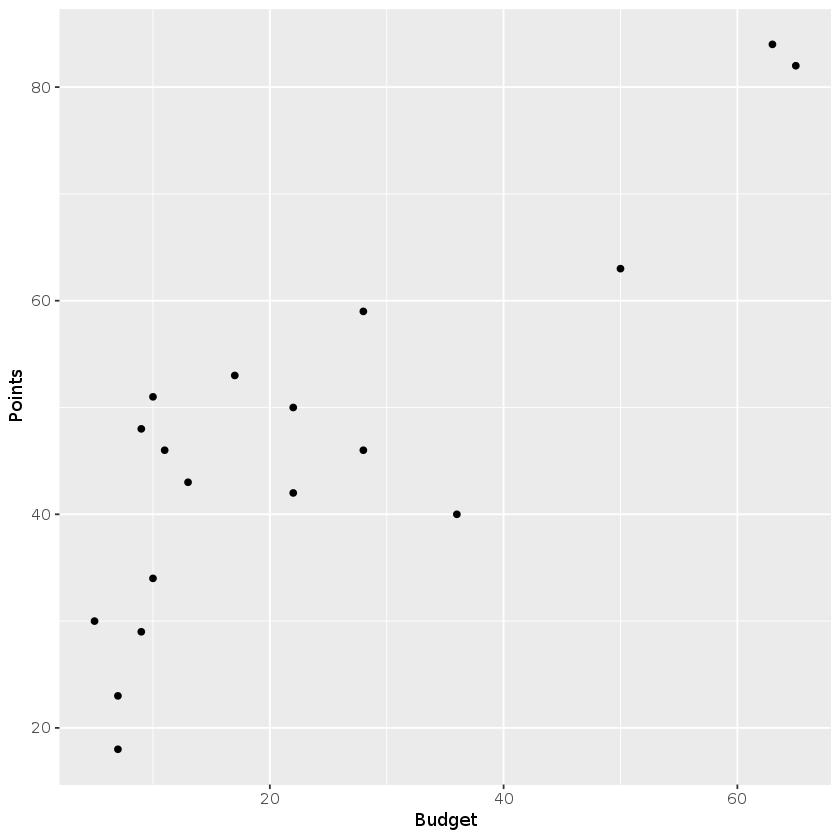

In [5]:
plot1 <- ggplot(data = df1, aes(x = Budget, y = Points)) +
  geom_point()
plot1

## The idea of linear regression

With linear regression we can examine the **statistical** relationship between 2 variables. This relationship is not perfect.
In this case we are specifically interested in linear relationships of the form:
$$ y = \alpha + \beta * x + \epsilon$$

Where $\alpha$ and $\beta$ are the parameters to be estimated and $\epsilon$ is the error or noise term. $\alpha$ is the intercept with the $y$-axis and $\beta$ determines the slope of the line.
We are interested in finding an $\alpha$ and $\beta$ that fit our data best.

## Best fit of the linear equation

Our first try will be to plot the horizontal line corresponding to the average value of the variable points, showing also (in red) the distance between the realized value of the variable points and the average value.

In [ ]:
plot2 <- plot1 + geom_hline(yintercept =  mean(df1$Points)) + 
geom_segment((aes(x = df1$Budget, y = df1$Points, xend = df1$Budget,
  yend = mean(Points), color= "red"))) + 
  theme(legend.position="none")
plot2

It appears that this line does not fit the data very well. 
Let's see if we can try better. It looks like an intercept of 30 points and a slope of 45 degrees is a reasonable estimate. We will therefore plot a line in the plot according to the formula:

$$ Points = 30 + Budget$$

To be able to plot the distances, we will have to calculate the predicted values of the points given a certain budget:


In [ ]:
df1 <- df1 %>%
mutate(new_try = 30 + Budget)
df1

Now we can make the plot:

In [ ]:
plot2a <- plot1  + geom_abline(intercept = 30, slope = 1, color = "blue", size = 2)  + 
geom_segment((aes(x = df1$Budget, y = df1$Points, xend = df1$Budget,
  yend = df1$new_try, color = "red"))) + 
  theme(legend.position = "none")
plot2a

This looks a lot better than our first try. That leaves us with the question about the "best" line. 
The "best" line in linear regression analysis is the line that minimizes the squared distance between the "real" values of $y$ and the predicted values of $y$ at the regression line.

We will minimize the following:

 $$ \sum\limits_{i=1}^n (y_i - (\alpha + \beta* x))^2 $$
 
We can derive this by using calculus, but `R` will do the work for you. Now we can plot the best fit:

In [ ]:
plot3 <- plot1 + geom_smooth(method = "lm", se = FALSE)
plot3

We can show that our plotted line in the last try, has the least squared error. Therefore, we must calculate the total sum of squared errors in all our tries.
 
We start with the first try (where we plotted the mean of the points). We will calculate the mean of the points and then calculated the squared distance.

Then we calculate squared distance of our new try (we have already calculated the predicted values to be able to plot the distances above).

After that we will include the predicted values based on our best line in our dataframe and calculate the squared distance.

In [ ]:

# First try
df1 <- df1 %>%
  mutate(mean_points = mean(Points)) %>%
  mutate(squared_distance = (Points - mean_points) ^ 2)

# New try
df1 <- df1 %>%
  mutate(squared_distance_new_try = (Points - new_try) ^ 2)

# Best line
regression <- lm(data = df1, Points ~ Budget)

df1 <- df1 %>%
  mutate(prediction_lm = regression$fitted.values) %>%
  mutate(squared_distance_lm = (Points - prediction_lm) ^ 2)

head(df1)

Now we can calculate the sum of the squared distances per model. First, we will make the "wide" table a "long" table, then group by model and calculated the squared distance per model.

In [ ]:


df2 <- df1 %>%
  select(squared_distance, squared_distance_new_try, squared_distance_lm) %>%
  gather(Model, Squared_distance, 1:3) %>%
  group_by(Model) %>%
  summarise(squared_distance = sum(Squared_distance)) %>%
  arrange(squared_distance)

df2

## Doing a regression

In the calculation above you have seen that we have run the command

`regression <- lm(data=df1, Points ~ Budget)`, 

to get the optimal line. In general, running a command like this:

`your_model <- lm(data = your_data, y ~ x)`

will run a regression. Until now we have run a regression with 1 predictor. We can run models with more predictors. The general command will look like this:

`your_model_with_more_predictors <- lm(data = your_data, y ~ x_1 + x_2 +x_3 + .. + x_n)`

If you want to run a model with all variables, the code would be

`your_model_with_all_predictors <- lm(data = your_data, y ~ .)`

Finally, we also want to know something about our model. The predicted values values can be obtained by the following command:

`your_model$fitted.values`

More general information can be obtained by:

`summary(your_model)`

For example in this case:



In [ ]:
summary(regression)

There is a lot of information in the summary. 

There are a few elements that I would like to highlight:

 **Estimate** : We are trying to get the best fitting linear equation of the form:
 $$ y= \alpha + \beta * x $$
 
 The output Estimate gives the values for the $\alpha$ (Intercept) and the $\beta$ (Budget) in this example. In our example the coefficient for Budget is 0.791, which indicates that an increase of 1 (million euro's in this case) may lead to nearly 0.8 points extra.
 
 ** Pr(>|t|)** or **p-values**
 
A regression tests the correlation between two variables. There is a "null-hypothesis"  (or $H_0$) which states that there is no correlation between the response and the predictor. If this hypothesis cannot be rejected, it means that there is no statistically significant correlation between the response and the predictor. If the hypothesis can be rejected, we assume there is a correlation.
 
The p-value (or probability value) is the probability that the null-hypohtesis is true. 


* high p-values mean that your data are likely if the null hypothesis is true and -vice versa-
* low p-values mean that your data are unlikely if the null hypothesis is true

So low p-value (or more stars) are better.

**$R^2$**

The intuition behind the $R^2$ is that this number gives an indication about the percentage of variation in the data  explained by the regression (i.e. a $R^2$ of 1 means that the model has a perfect fit). See [wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination) for more information.


For a more complete intuition of the regression output see [here](https://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R)



## Assumptions of linear regression

There are assumptions underlying linear regression. We do not have time to discuss this in this lecture ([see e.g. here for a tutorial in R](http://r-statistics.co/Assumptions-of-Linear-Regression.html)).
For this lecture, we will just learn how to check automatically for violation of these assumptions.
The gvlma package gives a possibility to check the assumptions with the following command:


In [ ]:
gvlma(regression)

In this case, we may conclude that the assumptions are met.

## Warning

Please note that correlation does not mean causation. In other words: if two variables (or more) correlate with each other, that does not mean that one variable causes the other. The correlation could be 
coincidence ("spurious correlation", see for some funny examples [here](http://www.tylervigen.com/spurious-correlations), there could be reverse causality (e.g. the tsar in Russia once sent doctors to an area with a cholera epidemic, the peasants killed the doctors because of the correlation between the appearance of the doctors and the incidence of the illness), or the variables are both caused by a unknown variable (see [here](http://abcnews.go.com/WNT/story?id=1633286&page=1) for an example).


# Assignment

In this assignment we will run different regression models on a constructed data set.

## Data

We will construct our data.

We will use the command `set.seed` to make our data reproducable.


In [ ]:
set.seed(123)
x1 <- runif(10000, min = 0, max = 1000)

df3 <- as.data.frame(x1) %>%
mutate(x2 =  runif(10000, min = 500, max = 1000)) %>%
mutate(error = rnorm(10000, mean = 0, sd = 100)) %>%
mutate(y = 6000 + 3 * x1 + 10 * x2 + error)

Our goal will be to obtain the 'real values' of the intercept (6000), $x_1$ (3) and $x_2$ (10)

## Inspection of the data

First we will inspect the data with the package PerformanceAnalytics. You can use the command `chart.Correlation`. This gives a nice overview of the data. See [here for more information](https://rdrr.io/cran/PerformanceAnalytics/man/chart.Correlation.html).

However, running the command will return many (unimportant and non-disruptive) warnings. Therefore, you might want to wrap your code in the command `suppressWarnings`. [See](https://github.com/braverock/PerformanceAnalytics/issues/62).

## Model 1

We will first do a linear regression with $y$ as response variable and $x_1$ as predictor. The equation that we will estimate has the form of:

$$ y = \alpha + \beta * X_1$$
Please comment on the results. Are the coefficients as you expected?
What do you think about the $R^2$

In [ ]:
model1 <- 
summary(model1)

Please check if the assumptions of linear regression are met:


Unfortunately, our model shows some problems.

You need to inspect visually how well the regression performs. Therfore, you are asked to make a scatterplot with the real values of y on the x-axis and predicted y-values on the y-axis.

In [ ]:
df3 <- df3 %>%
  

### Conclusion

We conclude that the model does not perform very well, although the variables are significant.

In this case we also know the real value of the parameters and the model provides a reasonable estimate of the $x_1$ parameter, but not of the intercept.


## Model 2

We will repeat model 1 with a slight adjustment.

We will now estimate:

$$ y = \alpha + \beta_1 * x_1 + \beta_2 * x_2 $$
You are asked to run this model 2.
Please comment on the results. Are the coefficients as you expected?
What do you think about the $R^2$

In [ ]:
model2<-
summary(model2)

We will also inspect visually how well the regression performs.
Therefore, you are asked to make a scatterplot with the real values of y on the x-axis and predicted y-values of model2 on the y-axis. Please check if the assumptions for linear regression are met.

In [ ]:
df3 <- df3 %>%
  

Are the assumption of linear regression met?

End of notebook